# ETF 골든크로스, 데드크로스 분석

- 5일 이동평균선 : 지난 5일 동안의 종가의 평균을 계산 -> 단기적인 가격 추세를 파악하는 데 유용


- 60일 이동평균선 : 지난 60일 동안의 종가의 평균을 계산 -> 단기적인 변동성을 줄이고 보다 중기적인 시장 추세를 반영

close price : 각 거래일의 종가

5-Day MA (5일 이동평균선):최근 5일 동안의 종가 평균

60-Day MA (60일 이동평균선): 최근 60일 동안의 종가 평균을 나타냅니다. 중기적인 가격 추세를 파악하는 데 유용

Golden Cross : 단기 이동평균선(5일)이 장기 이동평균선(60일)을 아래에서 위로 교차하는 지점을 나타낸다. 이는 매수 신호로 간주

Dead Cross: 단기 이동평균선(5일)이 장기 이동평균선(60일)을 위에서 아래로 교차하는 지점을 나타낸다. 이는 매도 신호로 간주

## 1. 필요 라이브러리

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm
import matplotlib.pyplot as plt

## 2. ETF 티커 리스트

In [ ]:
# ETF 티커 리스트
etf_tickers = [
    "069500.KS",  # KODEX 200
    "232080.KS",  # Tiger KOSDAQ 150 ETF
    "143850.KS",  # TIGER S&P500 Futures ETF
    "195930.KS",  # Tiger Synth-Euro Stocks 50 ETF H
    "238720.KS",  # KINDEX Japan Nikkei225 ETF(H)
    "192090.KS",  # TIGER ChinaA300 ETF
    "148070.KS",  # KOSEF 10년 국채
    "136340.KS",  # KBSTAR KRX300
    "182490.KS",  # TIGER 미국 채권
    "132030.KS",  # KODEX 골드 선물
    "130680.KS",  # TIGER WTI 원유
    "114800.KS",  # KODEX 인버스
    "138230.KS",  # KOSEF 미국달러선물
    "139660.KS"   # KOSEF 미국달러선물인버스
]


## 3. 기준일 설정 (오늘) 및 결과 저장 리스트와 프로그레스 바 설정

In [ ]:
# 기준일 설정 (오늘)
base_date = datetime.today()

# 골든크로스, 데드크로스 종목 저장할 리스트
golden_cross_list = []
dead_cross_list = []

# 프로그레스 바 설정
progress_bar = tqdm(total=len(etf_tickers), ncols=80, unit='ticker')


  0%|                                                | 0/14 [00:00<?, ?ticker/s]

## 4. 각 ETF별로 골든크로스, 데드크로스 확인

In [ ]:
for ticker in etf_tickers:
    try:
        # 종목 데이터 가져오기
        df = yf.download(ticker, start=base_date - timedelta(days=200), end=base_date)

        # 데이터가 충분한지 확인
        if df.empty or 'Close' not in df.columns:
            raise KeyError(f"No valid data for {ticker}")

        # 5일 평균선, 60일 평균선 계산
        df['MA5'] = df['Close'].rolling(window=5).mean()
        df['MA60'] = df['Close'].rolling(window=60).mean()

        # 골든크로스, 데드크로스 확인
        if len(df) > 60:
            df['Golden Cross'] = (df['MA5'] > df['MA60']) & (df['MA5'].shift(1) <= df['MA60'].shift(1))
            df['Dead Cross'] = (df['MA5'] < df['MA60']) & (df['MA5'].shift(1) >= df['MA60'].shift(1))

            if df['Golden Cross'].iloc[-1]:
                golden_cross_list.append(ticker)
            elif df['Dead Cross'].iloc[-1]:
                dead_cross_list.append(ticker)

        # 디버깅을 위해 각 데이터프레임의 마지막 몇 줄을 출력
        print(f"Ticker: {ticker}")
        print(df.tail())

    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        pass

    # 프로그레스 바 업데이트
    progress_bar.update(1)

# 프로그레스 바 종료
progress_bar.close()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
 21%|████████▌                               | 3/14 [00:00<00:01,  5.95ticker/s]

Ticker: 069500.KS
               Open     High      Low    Close  Adj Close   Volume      MA5  \
Date                                                                          
2024-07-15  39650.0  39685.0  39320.0  39680.0    39680.0  4369898  39715.0   
2024-07-16  39550.0  39830.0  39505.0  39705.0    39705.0  7029476  39706.0   
2024-07-17  39710.0  39730.0  39350.0  39375.0    39375.0  4714961  39634.0   
2024-07-18  38870.0  39085.0  38705.0  39085.0    39085.0  5775029  39455.0   
2024-07-19  38655.0  38720.0  38350.0  38625.0    38625.0  5641558  39294.0   

                    MA60  Golden Cross  Dead Cross  
Date                                                
2024-07-15  37514.083333         False       False  
2024-07-16  37579.500000         False       False  
2024-07-17  37629.000000         False       False  
2024-07-18  37685.083333         False       False  
2024-07-19  37725.500000         False       False  
Ticker: 232080.KS
               Open     High      Low  

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Ticker: 195930.KS
               Open     High      Low    Close  Adj Close  Volume      MA5  \
Date                                                                         
2024-07-15  17900.0  18000.0  17850.0  17920.0    17920.0   29743  17765.0   
2024-07-16  17805.0  17860.0  17720.0  17760.0    17760.0    6325  17763.0   
2024-07-17  17890.0  17890.0  17590.0  17590.0    17590.0    7619  17757.0   
2024-07-18  17590.0  17590.0  17440.0  17495.0    17495.0    8668  17708.0   
2024-07-19  17495.0  17495.0  17370.0  17400.0    17400.0   32020  17633.0   

                    MA60  Golden Cross  Dead Cross  
Date                                                
2024-07-15  17806.833333         False       False  
2024-07-16  17814.583333         False       False  
2024-07-17  17815.833333         False       False  
2024-07-18  17819.083333         False       False  
2024-07-19  17816.250000         False       False  
Ticker: 238720.KS
               Open     High      Low    Close


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close  Volume     MA5  \
Date                                                                    
2024-07-15  8735.0  8755.0  8690.0  8730.0     8730.0  128409  8655.0   
2024-07-16  8735.0  8805.0  8700.0  8800.0     8800.0   54497  8696.0   
2024-07-17  8830.0  8830.0  8745.0  8785.0     8785.0   90574  8737.0   
2024-07-18  8780.0  8840.0  8655.0  8830.0     8830.0   78212  8768.0   
2024-07-19  8870.0  8935.0  8805.0  8925.0     8925.0  192232  8814.0   

                   MA60  Golden Cross  Dead Cross  
Date                                               
2024-07-15  8840.750000         False       False  
2024-07-16  8840.000000         False       False  
2024-07-17  8838.333333         False       False  
2024-07-18  8838.500000         False       False  
2024-07-19  8840.333333         False       False  
Ticker: 148070.KS
                Open      High       Low     Close  Adj Close  Volume  \
Date                             


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
 79%|██████████████████████████████▋        | 11/14 [00:01<00:00, 10.49ticker/s]

Ticker: 182490.KS
               Open     High      Low    Close  Adj Close  Volume      MA5  \
Date                                                                         
2024-07-15  12855.0  12935.0  12855.0  12900.0    12900.0     999  12852.0   
2024-07-16  12895.0  12910.0  12865.0  12870.0    12870.0     550  12862.0   
2024-07-17  12975.0  12975.0  12900.0  12950.0    12950.0      84  12888.0   
2024-07-18  12975.0  12975.0  12895.0  12935.0    12935.0     464  12915.0   
2024-07-19  12885.0  12965.0  12885.0  12940.0    12940.0    2352  12919.0   

                    MA60  Golden Cross  Dead Cross  
Date                                                
2024-07-15  12704.083333         False       False  
2024-07-16  12710.416667         False       False  
2024-07-17  12717.250000         False       False  
2024-07-18  12723.833333         False       False  
2024-07-19  12730.750000         False       False  
Ticker: 132030.KS
               Open     High      Low    Close

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Ticker: 114800.KS
              Open    High     Low   Close  Adj Close    Volume     MA5  \
Date                                                                      
2024-07-15  3910.0  3945.0  3905.0  3910.0     3910.0  18398610  3902.0   
2024-07-16  3915.0  3925.0  3890.0  3910.0     3910.0  24557910  3904.0   
2024-07-17  3905.0  3945.0  3900.0  3945.0     3945.0  17176110  3914.0   
2024-07-18  3990.0  4010.0  3970.0  3970.0     3970.0  30081100  3933.0   
2024-07-19  4015.0  4050.0  4005.0  4020.0     4020.0  17388920  3951.0   

                   MA60  Golden Cross  Dead Cross  
Date                                               
2024-07-15  4124.500000         False       False  
2024-07-16  4117.166667         False       False  
2024-07-17  4111.666667         False       False  
2024-07-18  4105.083333         False       False  
2024-07-19  4100.333333         False       False  
Ticker: 138230.KS
               Open     High      Low    Close  Adj Close  Volume      MA5

100%|███████████████████████████████████████| 14/14 [00:01<00:00,  8.72ticker/s]

Ticker: 139660.KS
              Open    High     Low   Close  Adj Close  Volume     MA5  \
Date                                                                    
2024-07-15  8565.0  8565.0  8540.0  8555.0     8555.0     281  8560.0   
2024-07-16  8530.0  8530.0  8530.0  8530.0     8530.0      10  8555.0   
2024-07-17  8535.0  8570.0  8535.0  8570.0     8570.0     546  8560.0   
2024-07-18  8585.0  8590.0  8560.0  8560.0     8560.0      44  8558.0   
2024-07-19  8530.0  8530.0  8520.0  8530.0     8530.0     129  8549.0   

                   MA60  Golden Cross  Dead Cross  
Date                                               
2024-07-15  8597.083333         False       False  
2024-07-16  8597.166667         False       False  
2024-07-17  8596.583333         False       False  
2024-07-18  8596.500000         False       False  
2024-07-19  8595.833333         False       False  


## 5. 결과 출력

In [ ]:
# 결과 출력
print(f"골든크로스 종목 ({len(golden_cross_list)}개): {golden_cross_list}")
print(f"데드크로스 종목 ({len(dead_cross_list)}개): {dead_cross_list}")

골든크로스 종목 (0개): []
데드크로스 종목 (1개): ['232080.KS']


## 6. 콜든크로스와 데드크로스 종목 시각화

In [ ]:
# 골든크로스와 데드크로스 종목 시각화 함수
def plot_crosses(ticker_list, title):
    for ticker in ticker_list:
        df = yf.download(ticker, start=base_date - timedelta(days=200), end=base_date)
        df['MA5'] = df['Close'].rolling(window=5).mean()
        df['MA60'] = df['Close'].rolling(window=60).mean()

        # 골든크로스, 데드크로스 확인
        df['Golden Cross'] = (df['MA5'] > df['MA60']) & (df['MA5'].shift(1) <= df['MA60'].shift(1))
        df['Dead Cross'] = (df['MA5'] < df['MA60']) & (df['MA5'].shift(1) >= df['MA60'].shift(1))

        plt.figure(figsize=(14, 7))
        plt.plot(df.index, df['Close'], label='Close Price', color='black', alpha=0.6)
        plt.plot(df.index, df['MA5'], label='5-Day MA', color='green', alpha=0.7)
        plt.plot(df.index, df['MA60'], label='60-Day MA', color='red', alpha=0.7)

        # 골든 크로스 포인트 표시
        plt.scatter(df[df['Golden Cross']].index, df['MA5'][df['Golden Cross']], color='red', label='Golden Cross', marker='^', alpha=1)

        # 데드 크로스 포인트 표시
        plt.scatter(df[df['Dead Cross']].index, df['MA5'][df['Dead Cross']], color='blue', label='Dead Cross', marker='v', alpha=1)

        plt.title(f'{ticker} - {title}')
        plt.legend()
        plt.show()


In [ ]:
# 골든크로스 종목 시각화
plot_crosses(golden_cross_list, 'Golden Cross')

[*********************100%%**********************]  1 of 1 completed


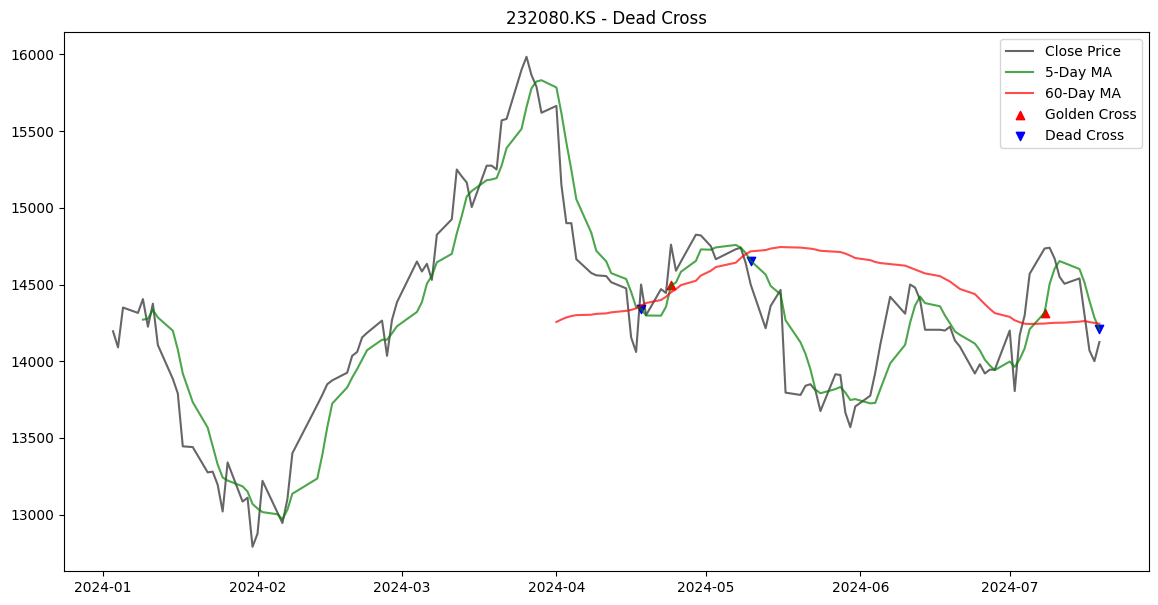

In [ ]:
# 데드크로스 종목 시각화
plot_crosses(dead_cross_list, 'Dead Cross')